In [3]:
import pandas as pd
from sentence_transformers import SentenceTransformer,util
import torch
import matplotlib.pyplot as plt
import numpy as np

In [4]:
catalog_df = pd.read_csv("SHL_catalog.csv")
catalog_df

,Assessment Name,URL,Duration,Remote Testing Support,Adaptive/IRT,Test Type,Skills,Description
0,Java Developer Assessment #1,https://shl.com/assessment/1,40,Yes,No,Coding,Java,The 'Java Developer Assessment #1' is a Coding...
1,Full Stack Developer Test #2,https://shl.com/assessment/2,50,Yes,Yes,Coding,JavaScript,Python
2,Data Analyst Screening #3,https://shl.com/assessment/3,45,No,No,Cognitive,SQL,Python
3,Python & SQL Challenge #4,https://shl.com/assessment/4,60,Yes,Yes,Coding,Python,SQL
4,Cognitive Aptitude Test #5,https://shl.com/assessment/5,30,Yes,No,Cognitive,Problem Solving,The 'Cognitive Aptitude Test #5' is a Cognitiv...
5,Personality Insights Assessment #6,https://shl.com/assessment/6,35,Yes,No,Personality,Teamwork,Communication
6,Frontend Developer Skills Test #7,https://shl.com/assessment/7,45,No,Yes,Coding,JavaScript,Communication
7,Business Communication Evaluation #8,https://shl.com/assessment/8,25,Yes,Yes,Communication,Communication,Teamwork
8,Logical Reasoning Assessment #9,https://shl.com/assessment/9,20,Yes,No,Cognitive,Problem Solving,The 'Logical Reasoning Assessment #9' is a Cog...
9,Coding Challenge for Developers #10,https://shl.com/assessment/10,60,No,Yes,Coding,Python,Java


In [6]:
catalog_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Assessment Name         50 non-null     object
 1   URL                     50 non-null     object
 2   Duration                50 non-null     int64 
 3   Remote Testing Support  50 non-null     object
 4   Adaptive/IRT            50 non-null     object
 5   Test Type               50 non-null     object
 6   Skills                  50 non-null     object
 7   Description             50 non-null     object
dtypes: int64(1), object(7)
memory usage: 3.2+ KB


In [7]:
def combine_row(row):
    parts = [
        str(row["Assessment Name"]),
        str(row["Duration"]),
        str(row["Remote Testing Support"]),
        str(row["Adaptive/IRT"]),
        str(row["Test Type"]),
        str(row["Skills"]),
        str(row["Description"]),
    ]
    return ' '.join(parts)

In [8]:
catalog_df['combined'] = catalog_df.apply(combine_row,axis=1)

In [9]:
catalog_df

,Assessment Name,URL,Duration,Remote Testing Support,Adaptive/IRT,Test Type,Skills,Description,combined
0,Java Developer Assessment #1,https://shl.com/assessment/1,40,Yes,No,Coding,Java,The 'Java Developer Assessment #1' is a Coding...,Java Developer Assessment #1 40 Yes No Coding ...
1,Full Stack Developer Test #2,https://shl.com/assessment/2,50,Yes,Yes,Coding,JavaScript,Python,Full Stack Developer Test #2 50 Yes Yes Coding...
2,Data Analyst Screening #3,https://shl.com/assessment/3,45,No,No,Cognitive,SQL,Python,Data Analyst Screening #3 45 No No Cognitive S...
3,Python & SQL Challenge #4,https://shl.com/assessment/4,60,Yes,Yes,Coding,Python,SQL,Python & SQL Challenge #4 60 Yes Yes Coding Py...
4,Cognitive Aptitude Test #5,https://shl.com/assessment/5,30,Yes,No,Cognitive,Problem Solving,The 'Cognitive Aptitude Test #5' is a Cognitiv...,Cognitive Aptitude Test #5 30 Yes No Cognitive...
5,Personality Insights Assessment #6,https://shl.com/assessment/6,35,Yes,No,Personality,Teamwork,Communication,Personality Insights Assessment #6 35 Yes No P...
6,Frontend Developer Skills Test #7,https://shl.com/assessment/7,45,No,Yes,Coding,JavaScript,Communication,Frontend Developer Skills Test #7 45 No Yes Co...
7,Business Communication Evaluation #8,https://shl.com/assessment/8,25,Yes,Yes,Communication,Communication,Teamwork,Business Communication Evaluation #8 25 Yes Ye...
8,Logical Reasoning Assessment #9,https://shl.com/assessment/9,20,Yes,No,Cognitive,Problem Solving,The 'Logical Reasoning Assessment #9' is a Cog...,Logical Reasoning Assessment #9 20 Yes No Cogn...
9,Coding Challenge for Developers #10,https://shl.com/assessment/10,60,No,Yes,Coding,Python,Java,Coding Challenge for Developers #10 60 No Yes ...


In [10]:
model = SentenceTransformer('all-MiniLM-L6-v2')

In [11]:
#converting each row into a vector/word embedding
corpus = catalog_df['combined'].tolist()
corpus_embeddings = model.encode(corpus,convert_to_tensor=True)

In [12]:
corpus_embeddings

tensor([[-4.1132e-02,  3.3712e-02, -1.5192e-02,  ...,  6.8478e-02,
          1.1157e-02, -3.8792e-02],
        [-8.3015e-02, -5.8202e-02,  3.8498e-02,  ...,  1.4818e-01,
          8.3665e-02, -4.9551e-02],
        [ 2.8609e-02,  1.4035e-02, -4.8932e-02,  ...,  6.8457e-03,
          6.1058e-02, -2.2558e-05],
        ...,
        [ 5.7849e-02,  1.8829e-02, -1.3150e-02,  ...,  4.9492e-02,
         -7.7539e-03, -8.2473e-02],
        [ 3.9874e-02,  2.4801e-03, -2.5676e-02,  ...,  3.8942e-02,
          8.5604e-03, -4.1729e-02],
        [-1.0276e-01, -2.3152e-02,  1.3056e-02,  ...,  1.6705e-01,
          8.0500e-02, -2.7817e-02]])

In [13]:
def print_assessments(user_query):
    model = SentenceTransformer('all-MiniLM-L6-v2')
    query_embedding = model.encode(user_query, convert_to_tensor = True)
    cosine_scores = util.cos_sim(query_embedding,corpus_embeddings)[0]
    top_k = min(5,len(corpus))
    top_results = torch.topk(cosine_scores,k=top_k)
    print('Top 5 Matching Assessments:\n')
    results = []
    for score, idx in zip(top_results[0], top_results[1]):
        idx = idx.item()
        result = {
            "Assessment Name": catalog_df.iloc[idx]['Assessment Name'],
            "Skills": catalog_df.iloc[idx]['Skills'],
            "Test Type": catalog_df.iloc[idx]['Test Type'],
            "Description": catalog_df.iloc[idx]['Description'],
            "Remote Testing Support": catalog_df.iloc[idx]['Remote Testing Support'],
            "Adaptive/IRT": catalog_df.iloc[idx]['Adaptive/IRT'],
            "Duration": catalog_df.iloc[idx]['Duration'],
            "URL": catalog_df.iloc[idx]['URL'],
            "Score": round(score.item(), 4)
        }

        print(f"Assessment: {result['Assessment Name']}")
        print(f"Skills: {result['Skills']}")
        print(f"Test Type: {result['Test Type']}")
        print(f"Description: {result['Description']}")
        print(f"Remote Testing Support: {result['Remote Testing Support']}")
        print(f"Adaptive/IRT: {result['Adaptive/IRT']}")
        print(f"Duration: {result['Duration']} mins")
        print(f"URL: {result['URL']}")
        print(f"Score: {result['Score']}")
        print("-" * 50)
        
        results.append(result)
    return results

In [14]:
user_query = input("Enter your query:")
print("\n")
results = print_assessments(user_query)

Enter your query:java


Top 5 Matching Assessments:

Assessment: Problem Solving & Coding Challenge #12
Skills: Java
Test Type: Coding
Description: Problem Solving
Remote Testing Support: No
Adaptive/IRT: No
Duration: 55 mins
URL: https://shl.com/assessment/12
Score: 0.5956
--------------------------------------------------
Assessment: Coding Challenge for Developers #10
Skills: Python
Test Type: Coding
Description: Java
Remote Testing Support: No
Adaptive/IRT: Yes
Duration: 60 mins
URL: https://shl.com/assessment/10
Score: 0.5402
--------------------------------------------------
Assessment: Java Coding Drill #47
Skills: Java
Test Type: Coding
Description: The 'Java Coding Drill #47' is a Coding test focused on Java. Duration is 40 mins. It supports remote testing: Yes and adaptive format: No.
Remote Testing Support: Yes
Adaptive/IRT: No
Duration: 40 mins
URL: https://shl.com/assessment/47
Score: 0.5342
--------------------------------------------------
Assessment: Quick Java Screenin

In [15]:
def compute_metrics(benchmark_queries,k=5):
    recall_scores = []
    average_precisions = []

    for entry in benchmark_queries:
        query = entry["query"]
        relevant_items = entry["relevant"]

        results = find_assessments(query)
        topk = [res["Assessment Name"] for res in results[:k]]

        #recall@k
        count = 0
        for item in topk:
            if item in relevant_items:
                count+=1
        recall_score = count/len(relevant_items)
        recall_scores.append(recall_score)

        #map@k
        ap = 0.0
        relevant_count = 0
        for i,res in enumerate(topk):
            if res in relevant_items:
                relevant_count+=1
                precision_at_k = relevant_count/(i+1)
                ap += precision_at_k
        ap = ap/min(k,len(relevant_items))
        average_precisions.append(ap)
        
    recall = sum(recall_scores)/len(recall_scores)
    map_ = sum(average_precisions)/len(average_precisions)
    
    print(f"Recall@{k}: {recall:.4f}")
    print(f"MAP@{k}: {map_:.4f}")

In [16]:
def find_assessments(user_query,k=5):
    model = SentenceTransformer('all-MiniLM-L6-v2')
    query_embedding = model.encode(user_query, convert_to_tensor = True)
    cosine_scores = util.cos_sim(query_embedding,corpus_embeddings)[0]
    top_k = min(k,len(corpus))
    top_results = torch.topk(cosine_scores,k=top_k)
    results = []
    for score, idx in zip(top_results[0], top_results[1]):
        idx = idx.item()
        result = {
            "Assessment Name": catalog_df.iloc[idx]['Assessment Name'],
            "Skills": catalog_df.iloc[idx]['Skills'],
            "Test Type": catalog_df.iloc[idx]['Test Type'],
            "Description": catalog_df.iloc[idx]['Description'],
            "Remote Testing Support": catalog_df.iloc[idx]['Remote Testing Support'],
            "Adaptive/IRT": catalog_df.iloc[idx]['Adaptive/IRT'],
            "Duration": catalog_df.iloc[idx]['Duration'],
            "URL": catalog_df.iloc[idx]['URL'],
            "Score": round(score.item(), 4)
        }
        results.append(result)
    return results

In [17]:
benchmark_queries = [
    {
        "query": "I am hiring for Java developers who can also collaborate effectively with my business teams. Looking for an assessment that can be completed in 40 minutes.",
        "relevant": ["Java Developer Assessment #1","Quick Java Screening #27","Java Coding Drill #47"]
    },
    {
        "query": "Suggest an assessment for a fresher data analyst that includes Python and SQL skills in under 50 minutes.",
        "relevant": ["Data Analyst Screening #3","SQL & Reporting Challenge #18","Cross-functional Assessment #41"]
    },
    {
        "query": "Looking for remote-enabled JavaScript technical assessment. Needs to be adaptive.",
        "relevant": ["JavaScript Screening Test #11"]
    },
    {
        "query": "Want to assess communication and teamwork skills in under 30 minutes.",
        "relevant": ["Communication Skills Test #19","Business Communication Evaluation #8","Communication & Team Fit #24","Interpersonal Skills Assessment #43"]
    },
]

In [18]:
compute_metrics(benchmark_queries,k=5)

Recall@5: 0.8542
MAP@5: 0.7181


# As we increase the value of K, how does Recall and Map get affected?

In [19]:
def compute_metrics_at_ks(benchmark_queries, ks=[1, 3, 5, 10]):
    recalls = []
    maps = []

    for k in ks:
        recall_scores = []
        average_precisions = []

        for entry in benchmark_queries:
            relevant_items = entry["relevant"]
            results = find_assessments(entry["query"])
            topk = [res["Assessment Name"] for res in results[:k]]

            # Recall@K
            matched = sum(1 for item in topk if item in relevant_items)
            recall = matched / len(relevant_items)
            recall_scores.append(recall)

            # MAP@K
            ap = 0.0
            relevant_count = 0
            for i, res in enumerate(topk):
                if res in relevant_items:
                    relevant_count += 1
                    ap += relevant_count / (i + 1)
            ap = ap / min(k, len(relevant_items))
            average_precisions.append(ap)

        recalls.append(sum(recall_scores) / len(recall_scores))
        maps.append(sum(average_precisions) / len(average_precisions))

    return ks, recalls, maps

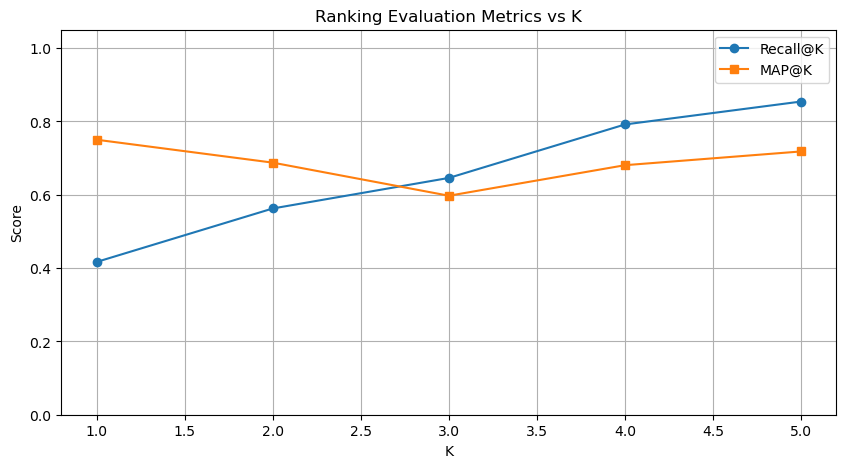

In [20]:
ks, recalls, maps = compute_metrics_at_ks(benchmark_queries, ks=[1, 2, 3, 4, 5])

plt.figure(figsize=(10, 5))
plt.plot(ks, recalls, label="Recall@K", marker='o')
plt.plot(ks, maps, label="MAP@K", marker='s')
plt.title("Ranking Evaluation Metrics vs K")
plt.xlabel("K")
plt.ylabel("Score")
plt.ylim(0, 1.05)
plt.grid(True)
plt.legend()
plt.show()

In [21]:
import requests
from bs4 import BeautifulSoup

In [22]:
def extract_text_from_url(url):
    try:
        response = requests.get(url,headers={'User-Agent':"Mozilla/5.0"})
        soup = BeautifulSoup(response.text,'html.parser')
        return ' '.join(soup.get_text().split())
    except Exception as e:
        return f"Error:{e}"

In [23]:
extracted_text = extract_text_from_url("https://www.linkedin.com/jobs/view/research-engineer-ai-at-shl-4194768899/?originalSubdomain=in")
print(extracted_text)

SHL hiring Research Engineer, AI in Gurgaon, Haryana, India | LinkedIn Skip to main content LinkedIn Research Engineer, AI in Delhi, India Expand search This button displays the currently selected search type. When expanded it provides a list of search options that will switch the search inputs to match the current selection. Jobs People Learning Clear text Clear text Clear text Clear text Clear text Join now Sign in Research Engineer, AI SHL Gurgaon, Haryana, India Research Engineer, AI SHL Gurgaon, Haryana, India 2 weeks ago Be among the first 25 applicants See who SHL has hired for this role Report this job Use AI to assess how you fit Get AI-powered advice on this job and more exclusive features. Am I a good fit for this job? Tailor my resume Sign in to access AI-powered advices Sign in Welcome back Email or phone Password Show Forgot password? Sign in or By clicking Continue to join or sign in, you agree to LinkedIn’s User Agreement, Privacy Policy, and Cookie Policy. New to Linke

In [24]:
pip install google-generativeai

Note: you may need to restart the kernel to use updated packages.


In [25]:
import os
import google.generativeai as genai

In [26]:
model = genai.GenerativeModel("gemini-1.5-pro")

In [27]:
import re

def extract_url_from_text(text):
    match = re.search(r'(https?://[^\s,]+)', text)
    if match:
        return match.group(1)
    return None

In [28]:
def extract_features_with_llm(user_query):
    prompt = f"""
You are an intelligent assistant helping to recommend SHL assessments.

The input below may be:
1. A natural language query describing assessment needs (e.g., "Need a Python test under 60 minutes").
2. A job description (JD) pasted directly.
3. A job description URL (already converted into text outside this function).
4. A combination of user query + JD.

Your task is to extract and summarize key hiring features from the input. Look for and include the following **if available**:

- Job Title  
- Duration of Test  
- Remote Testing Support (Yes/No)  
- Adaptive/IRT Format (Yes/No)  
- Test Type  
- Skills Required  
- Any other relevant hiring context

Format your response as a **single line** like this:

`<Job Title> <Duration> <Remote Support> <Adaptive> <Test Type> <Skills> <Other Info>`

Skip any fields not mentioned — do not include placeholders or "N/A".

---
Input:
{user_query}

Only return the final, clean sentence — no explanations.
"""

    response = model.generate_content(prompt)
    return response.text.strip()

In [29]:
query = "Here is a JD text:https://www.linkedin.com/jobs/view/research-engineer-ai-at-shl-4194768899/?originalSubdomain=in, can you recommend some assessment that can help me screen applications. Time limit is less than 30 minutes."

url = extract_url_from_text(query)
print("Extracted URL -",url)
print("\n")
if url:
    extracted_text = extract_text_from_url(url)
    query += " "+ extracted_text
    user_query = extract_features_with_llm(query)
    print("LLM extracted query - ",user_query)
    print("\n")
    print_assessments(user_query)
    
else:
    print_assessments(query)

Extracted URL - https://www.linkedin.com/jobs/view/research-engineer-ai-at-shl-4194768899/?originalSubdomain=in




DefaultCredentialsError: Your default credentials were not found. To set up Application Default Credentials, see https://cloud.google.com/docs/authentication/external/set-up-adc for more information.